# Gaussian mixture model (GMM) using E-M algorithm

Use the sample vector, $\mathbf{x}$, to estimate the mixing proportions, $\mathbf{\hat{p}}$, and distribution means, $\mathbf{\hat{\mu}}$.

__Expectation (E) Step:__

$Z_{ij}^{*}=\frac{p_{k}f(x_{i}|\mu_{k},\sigma^{2})}{\sum_{j=1}^{3}p_{j}f(x_{i}|\mu_{j},\sigma^{2})}$

where $f$ is the normal distribution

__Maximization (M) Step:__

$\hat{p}_{j}=\frac{1}{n}\sum_{i=1}^{n}Z_{ij}^{*}$

$\hat{\mu}_{j}=\frac{\sum_{i=1}^{n}x_{i}Z_{ij}^{*}}{\sum_{i=1}^{n}Z_{ij}^{*}}$

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm
import seaborn as sns

In [2]:
plt.rcParams["figure.figsize"] = (20,10)

sns.set(font_scale=2.5)
sns.set_style("whitegrid")

In [3]:
N = 1000
K = 3

p = [0.2,0.5,0.3]
n = [math.floor(N*i) for i in p]
mu = [1.5,5.2,8.7]
sig = [1.,1.,1.]

x = [norm.rvs(loc=mu_,scale=sig_,size=n_) for mu_,sig_,n_ in zip(mu,sig,n)]
x = np.concatenate(x,axis=0)

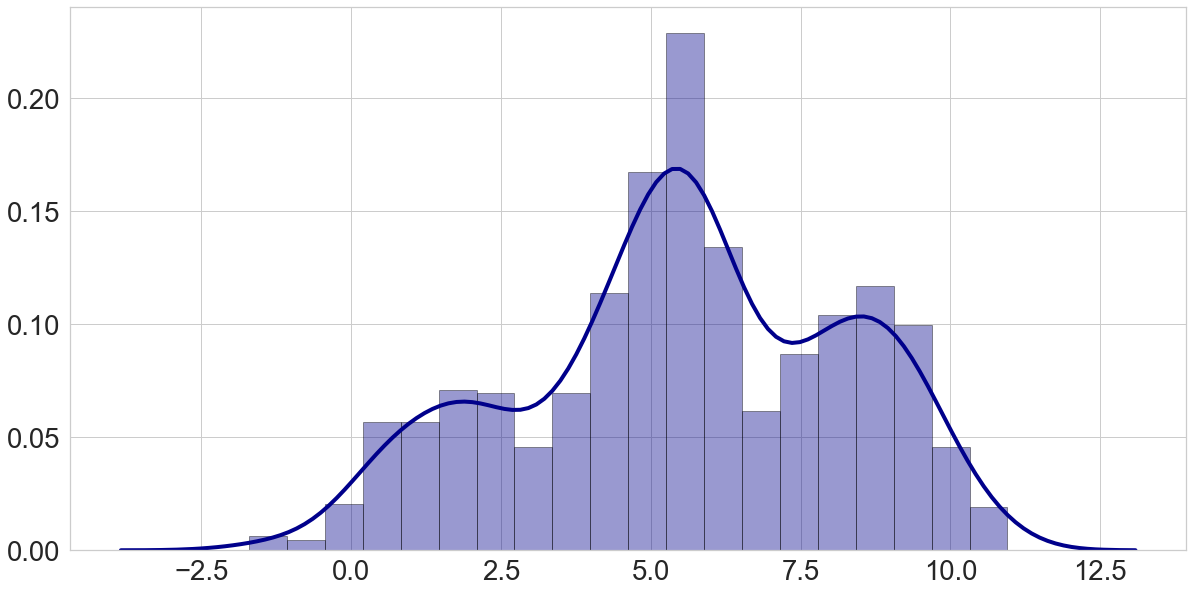

In [4]:
sns.distplot(
    x,
    hist=True,
    kde=True,
    bins=20,
    color='darkblue',
    hist_kws={'edgecolor':'black'},
    kde_kws={'linewidth':4}
)

In [5]:
p_opt = [1/3,1/3,1/3] # initialize p-vec
mu_opt = [3.,4.,7.] # initialize mu-vec

p_opt_list = [p_opt]
mu_opt_list = [mu_opt]

while True:
    
    # ------ #
    # E-Step #
    # ------ #
    
    numer_ = [norm.pdf(x=x,loc=m_,scale=1.)*p_ 
              for m_,p_ in zip(mu_opt,p_opt)]
    denom_ = sum(numer_)
    posterior_ = [i/denom_ for i in numer_]
    
    # ------ #
    # M-Step #
    # ------ #
    
    # sum(posterior_) / N
    p_opt = [round(sum(i)/N,4) for i in posterior_]
    # sum(posterior_ * X) / sum(posterior_)
    mu_opt = [round(sum(i*x)/sum(i),4) for i in posterior_]
    
    # -------------- #
    # Save Iteration #
    # -------------- #
    
    p_opt_list.append(p_opt)
    mu_opt_list.append(mu_opt)
    
    # ---------------- #
    # Convergence Test #
    # ---------------- #
    
    params_list = [p_opt_list,mu_opt_list]
    diff_list = [sum([i-j for i,j in zip(lst[-1],lst[-2])]) 
                 for lst in params_list]
    
    if sum(diff_list) == 0:
        break
        
print("Group proportions: " + str([round(i,2) for i in p_opt]))
print("Group means: " + str([round(i,2) for i in mu_opt]))

Group proportions: [0.2, 0.5, 0.3]
Group means: [1.53, 5.28, 8.64]


In [6]:
colors = ['red','green','blue']

posterior_df = pd.DataFrame({'Post1': posterior_[0], 'Post2': posterior_[1], 'Post3': posterior_[2]})

index_vec_ = [i+1 for i in range(N)]
classes_vec_ = posterior_df.idxmax(axis=1).values
classes_vec_ = [int(c.replace('Post','')) for c in classes_vec_]
colors_vec_ = np.concatenate([n[idx]*[col] for idx,col in enumerate(colors)],axis=0)

plot_df = pd.DataFrame({'Index':index_vec_, 'Classes':classes_vec_, 'Colors':colors_vec_})

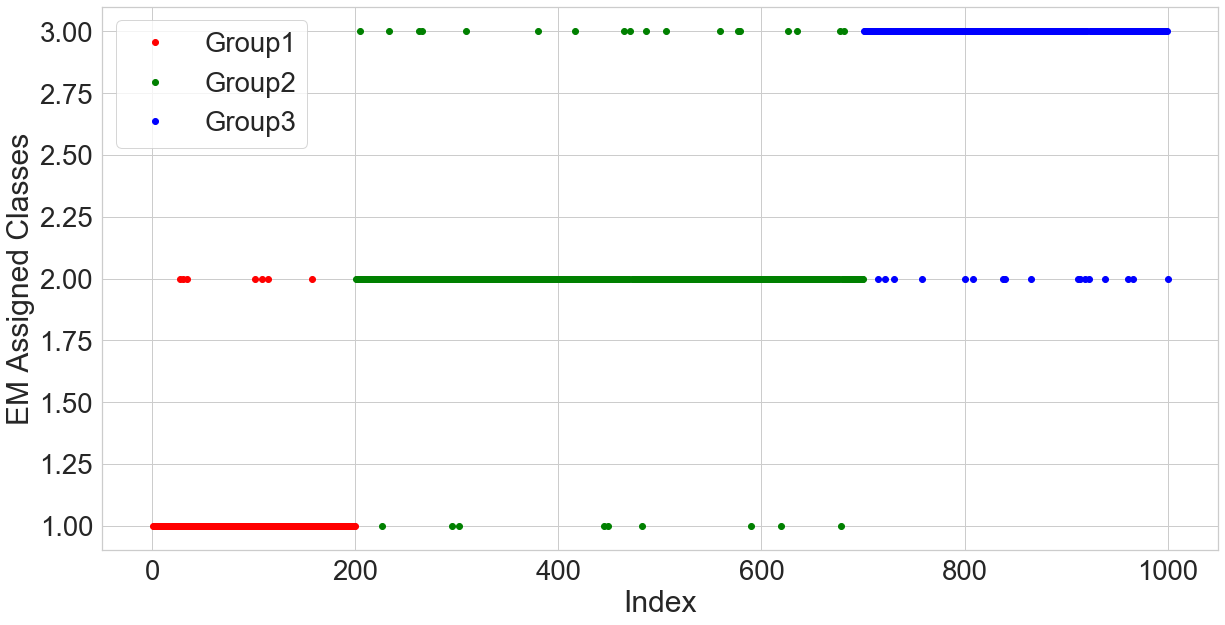

In [7]:
for idx,col in enumerate(colors):
    tmp = plot_df[plot_df['Colors'] == col]
    plt.plot(tmp.Index.values,tmp.Classes.values,'o',c=col,label='Group'+str(idx+1))
plt.xlabel('Index')
plt.ylabel('EM Assigned Classes')
plt.legend()
plt.show()

In [8]:
def plot_convergence_paths(metric_, true_vals_, list_, K):
    
    df = pd.DataFrame(list_, columns=[metric_+str(i) for i in range(1,K+1)])
    indices=(df.index+1).values
    
    fig,axes = plt.subplots(1,K,sharey=True)
    fig.suptitle('Convergence Paths: '+metric_)

    for idx, ax in enumerate(axes.flat):

        ax.plot(indices,df[metric_+str(idx+1)].values, color='blue', linewidth=5)
        ax.axhline(true_vals_[idx], color='black', linewidth=5, linestyle='dashed')
        ax.set_ylabel('Group '+str(idx+1)+' '+metric_)

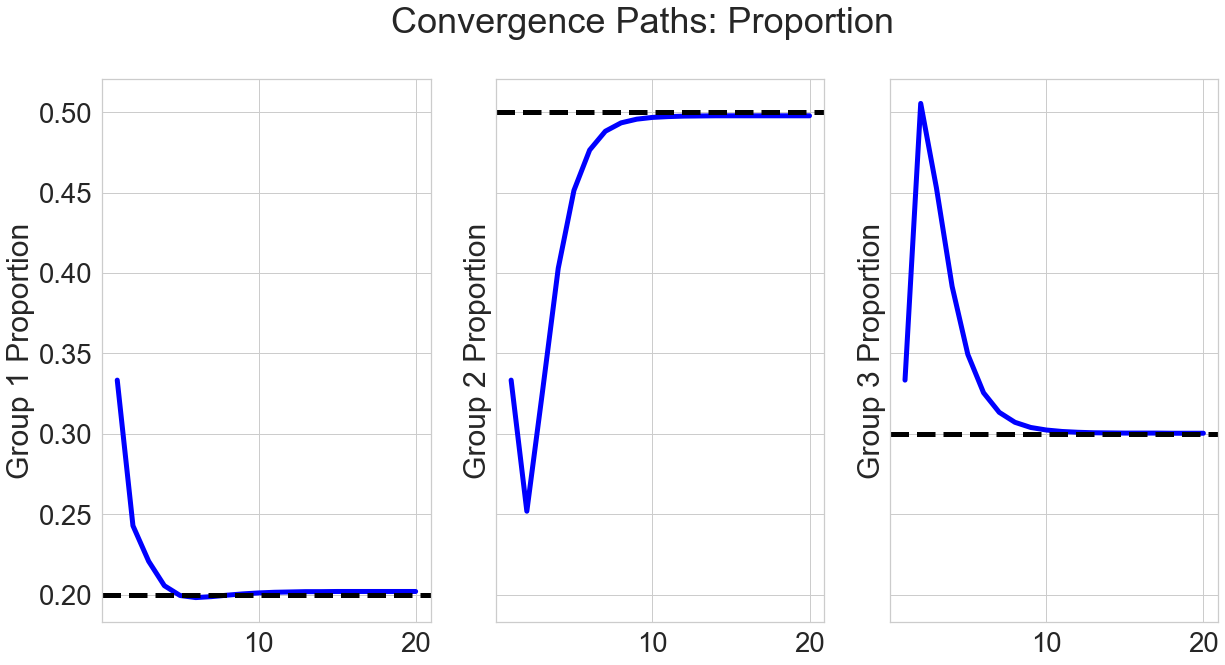

In [9]:
plot_convergence_paths(metric_='Proportion', true_vals_=p, list_=p_opt_list, K=K)

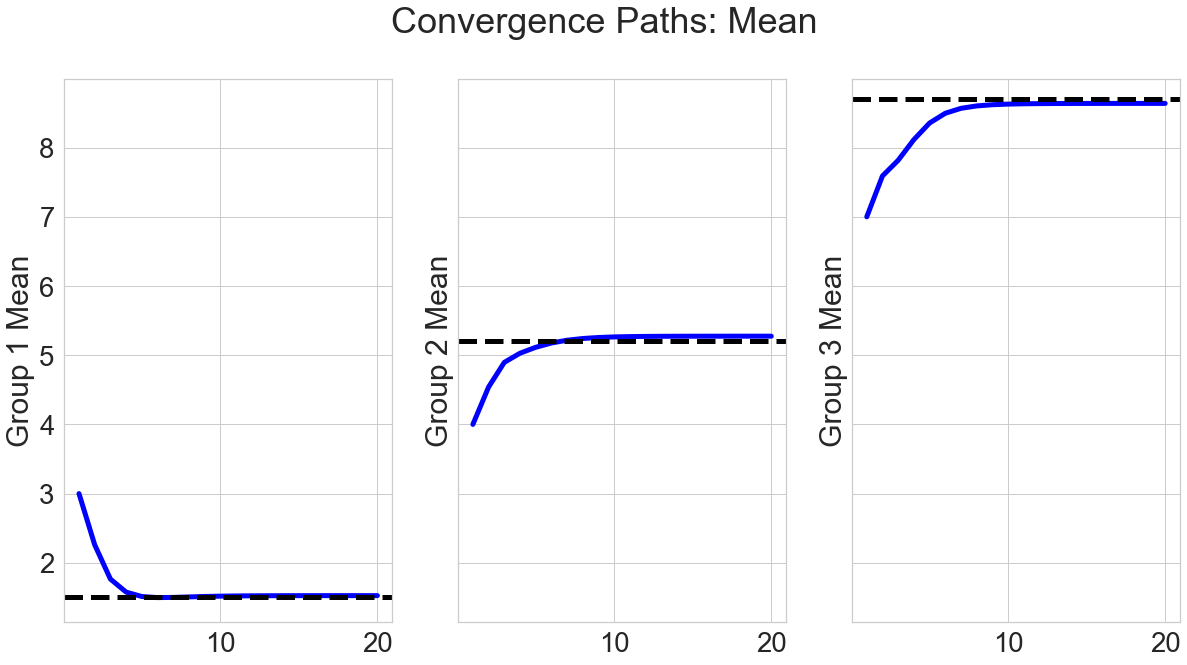

In [10]:
plot_convergence_paths(metric_='Mean', true_vals_=mu, list_=mu_opt_list, K=K)